In [1]:
#we are using the dataset which contain two different data of healthy and schizophrenia 
from glob import glob
import os
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
all_files = glob("dataverse_files/*.edf")
print(len(all_files))

28


In [3]:
healthy_file_path = [i for i in all_files if "h" in  i.split('\\')[1]]
patient_file_path = [i for i in all_files if "s" in i.split("\\")[1]]
print(len(healthy_file_path), len(patient_file_path))

14 14


In [4]:
def sep(a, b):
    c = []
    d = []
    for i, j in enumerate(a):
        if i < b:
            c.append(j)
        else:
            d.append(j)
    return c, d 

In [5]:
#first divide data like 30% for test data and 70% for train data 
data_train_h, data_test_h = sep(healthy_file_path, 9)
print(len(data_train_h), len(data_test_h))
data_train_p, data_test_p = sep(patient_file_path, 9)
print(len(data_train_p), len(data_test_p))
#Now out of that 70% again divde into 30%train and 70% unlabeld data 
data_unl_h, data_train_h = sep(data_train_h, 6)
print(len(data_train_h), len(data_unl_h))
data_unl_p, data_train_p = sep(data_train_p, 6)
print(len(data_unl_p), len(data_train_p))

9 5
9 5
3 6
6 3


In [6]:
#you can say out of 14 healthy 5 for test 6 for unlabeld and 3 for train the model 

In [7]:
def read_data(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    array = epochs.get_data()
    return array

In [8]:
sample_data = read_data(data_train_h[0])

Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
227 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


In [9]:
sample_data.shape #no of eopch, channels, length of channel

(227, 19, 1250)

In [10]:
%%capture
control_epoch_array = [read_data(i) for i in data_train_h]
patient_epoch_array = [read_data(i) for i in data_train_p]

In [11]:
len(control_epoch_array)

3

In [12]:
control_epoch_label = [len(i)*[0] for i in control_epoch_array] 
patient_epoch_label = [len(i)*[1] for i in patient_epoch_array] 
print(len(control_epoch_label), len(patient_epoch_label))

3 3


In [13]:
data_list = control_epoch_array + patient_epoch_array
label_list = control_epoch_label + patient_epoch_label

In [14]:
print(len(data_list))
len(label_list)

6


6

In [15]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

6

In [16]:
data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)
print(len(data_array), len(label_array), len(group_array))
print((data_array.shape), label_array.shape, (group_array.shape))

1539 1539 1539
(1539, 19, 1250) (1539,) (1539,)


In [17]:
print(label_array.shape)
print(data_array.shape)
label_array

(1539,)
(1539, 19, 1250)


array([0, 0, 0, ..., 1, 1, 1])

In [18]:
from scipy import stats
def mean(x):
    return np.mean(x, axis=-1)
def std(x):
    return np.std(x, axis=-1)
def ptp(x):
    return np.ptp(x, axis=-1)
def var(x):
    return np.var(x, axis=-1)
def minim(x):
    return np.min(x, axis=-1)
def maxim(x):
    return np.max(x, axis=-1)
def argminim(x):
    return np.argmin(x, axis=-1)
def argmax(x):
    return np.argmax(x, axis=-1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis=-1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis=-1)), axis=-1)
def skewness(x):
    return stats.skew(x, axis=-1)
def kurtosis(x):
    return stats.kurtosis(x, axis=-1)
def concatenate_feature(x):
    return np.concatenate((mean(x), std(x), ptp(x), var(x), minim(x), maxim(x), argmax(x), argminim(x), rms(x), abs_diff_signal(x), skewness(x), kurtosis(x)), axis=-1)

In [19]:
fature = []
for d in data_array:
    fature.append(concatenate_feature(d))

In [20]:
#no. of rows=1539 and columns = 228
feature_array = np.array(fature)
feature_array.shape

(1539, 228)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem

In [22]:
# Define multiple kernels to be used
kernels = [('linear', 'Linear'), 
           ('rbf', 'RBF'), 
           ('poly', 'Polynomial')]

# Define parameter grid for each kernel
param_grid = [
    {'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['linear']},
    {'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['rbf'], 'svc__gamma': [0.1, 1, 10, 100]},
    {'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['poly'], 'svc__degree': [2, 3, 4]}
]

# Define pipeline with scaling, kernel approximation, and SVM
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('nystroem', Nystroem()),
    ('svc', SVC())
])


In [23]:
# Define grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

In [24]:
# Train transductive SVM with MKL using GridSearchCV for hyperparameter tuning
grid_search.fit(feature_array, label_array,groups=group_array)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nystroem', Nystroem()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10, 100],
                          'svc__gamma': [0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3, 4],
                          'svc__kernel': ['poly']}])

In [25]:
grid_search.best_score_

0.8739921316468546

In [26]:
grid_search.predict(feature_array)


array([0, 0, 0, ..., 1, 1, 1])

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
a  = classification_report(label_array, grid_search.predict(feature_array))
print("this for train data", a)

this for train data               precision    recall  f1-score   support

           0       1.00      0.94      0.97       680
           1       0.96      1.00      0.98       859

    accuracy                           0.97      1539
   macro avg       0.98      0.97      0.97      1539
weighted avg       0.98      0.97      0.97      1539



In [29]:
#predict for unl data 
control_epoch_array_unl = [read_data(i) for i in data_unl_h]
patient_epoch_array_unl = [read_data(i) for i in data_unl_p]
data_list_unl = control_epoch_array_unl + patient_epoch_array_unl
data_array_unl = np.vstack(data_list_unl)
print(data_array_unl.shape)
fature_unl = []
for d in data_array_unl:
    fature_unl.append(concatenate_feature(d))
feature_array_unl = np.array(fature_unl)
feature_array_unl.shape
control_epoch_label_unl = [len(i)*[0] for i in control_epoch_array_unl] 
patient_epoch_label_unl = [len(i)*[1] for i in patient_epoch_array_unl] 
print(len(control_epoch_label_unl), len(patient_epoch_label_unl))
label_list_unl = control_epoch_label_unl + patient_epoch_label_unl
label_array_unl = np.hstack(label_list_unl)
label_array_unl

Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
231 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
236 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 236 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
211 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 211 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s02.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
286 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 286 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
240 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 301 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s05.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
222 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 222 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s06.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 184 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


(2828, 19, 1250)
6 6


array([0, 0, 0, ..., 1, 1, 1])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [31]:
data_label_unl = grid_search.predict(feature_array_unl)
data_label_unl

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
a = classification_report(label_array_unl, data_label_unl)
print(a)

              precision    recall  f1-score   support

           0       0.60      0.21      0.32      1384
           1       0.53      0.86      0.66      1444

    accuracy                           0.55      2828
   macro avg       0.57      0.54      0.49      2828
weighted avg       0.57      0.55      0.49      2828



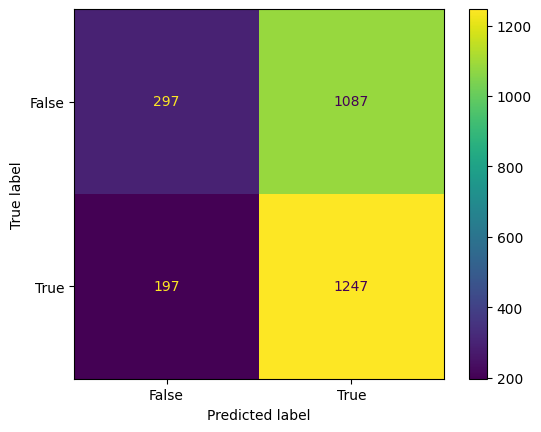

In [33]:
confusion_matrix = confusion_matrix(label_array_unl, data_label_unl)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [34]:
total_label = np.concatenate((label_array, data_label_unl))

In [35]:
total_feature = np.concatenate((feature_array, feature_array_unl))

In [36]:
data_list = data_list + data_list_unl

In [37]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

18

In [38]:
group_array_1 = np.hstack(group_list)

In [39]:
#train a model on new data
# Define grid search with cross-validation
grid_search_1 = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid_search_1.fit(total_feature,total_label,groups=group_array_1)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nystroem', Nystroem()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.1, 1, 10, 100],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.1, 1, 10, 100],
                          'svc__gamma': [0.1, 1, 10, 100],
                          'svc__kernel': ['rbf']},
                         {'svc__C': [0.1, 1, 10, 100], 'svc__degree': [2, 3, 4],
                          'svc__kernel': ['poly']}])

In [40]:
grid_search_1.best_score_

0.8515940980495463

In [41]:
## Test on test data 

In [42]:
control_epoch_array_test = [read_data(i) for i in data_test_h]
patient_epoch_array_test = [read_data(i) for i in data_test_p]
data_list_test = control_epoch_array_test + patient_epoch_array_test
data_array_test = np.vstack(data_list_test)
print(data_array_test.shape)
fature_test = []
for d in data_array_test:
    fature_test.append(concatenate_feature(d))
feature_array_test = np.array(fature_test)
feature_array_test.shape
control_epoch_label_test = [len(i)*[0] for i in control_epoch_array_test] 
patient_epoch_label_test = [len(i)*[1] for i in patient_epoch_array_test] 
print(len(control_epoch_label_test), len(patient_epoch_label_test))
label_list_test = control_epoch_label_test + patient_epoch_label_test
label_array_test = np.hstack(label_list_test)
len(label_array_test)

Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
278 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
228 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 228 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h12.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
224 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 224 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h13.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
241 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 241 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info str

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 216 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
212 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
339 matching events found


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 339 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
283 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
542 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 542 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished


(2834, 19, 1250)
5 5


2834

In [43]:
print(np.array(label_array_test))
feature_array_test.shape

[0 0 0 ... 1 1 1]


(2834, 228)

In [44]:
d = grid_search.predict(feature_array_test)
d

array([1, 1, 1, ..., 1, 1, 1])

In [45]:
a = classification_report(label_array_test, d)
print(a)

              precision    recall  f1-score   support

           0       0.44      0.25      0.32      1187
           1       0.59      0.77      0.67      1647

    accuracy                           0.55      2834
   macro avg       0.51      0.51      0.49      2834
weighted avg       0.53      0.55      0.52      2834



In [46]:
group_array

array([0, 0, 0, ..., 5, 5, 5])

In [47]:
## This is for LOgistic regression 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold,GridSearchCV,cross_val_score,cross_validate

In [49]:
clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
gscv.fit(feature_array,label_array,groups=group_array)

C:\Users\kunde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
a  = classification_report(label_array, gscv.predict(feature_array))
print("this for train data", a)

this for train data               precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       859

    accuracy                           1.00      1539
   macro avg       1.00      1.00      1.00      1539
weighted avg       1.00      1.00      1.00      1539



In [51]:
gscv.best_score_

0.4405528691245061

In [52]:
gscv.predict(feature_array)

array([0, 0, 0, ..., 1, 1, 1])

In [53]:
#predict for unl data 
control_epoch_array_unl = [read_data(i) for i in data_unl_h]
patient_epoch_array_unl = [read_data(i) for i in data_unl_p]
data_list_unl = control_epoch_array_unl + patient_epoch_array_unl
data_array_unl = np.vstack(data_list_unl)
print(data_array_unl.shape)
fature_unl = []
for d in data_array_unl:
    fature_unl.append(concatenate_feature(d))
feature_array_unl = np.array(fature_unl)
feature_array_unl.shape
control_epoch_label_unl = [len(i)*[0] for i in control_epoch_array_unl] 
patient_epoch_label_unl = [len(i)*[1] for i in patient_epoch_array_unl] 
print(len(control_epoch_label_unl), len(patient_epoch_label_unl))
label_list_unl = control_epoch_label_unl + patient_epoch_label_unl
label_array_unl = np.hstack(label_list_unl)
label_array_unl

Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227499  =      0.000 ...   909.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
227 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 227 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 231249  =      0.000 ...   924.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Not setting metadata
231 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 231 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 236249  =      0.000 ...   944.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upp

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
236 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 236 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 232499  =      0.000 ...   929.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
232 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 232 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 211249  =      0.000 ...   844.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
211 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 211 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 286249  =      0.000 ...  1144.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
286 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 286 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 240999  =      0.000 ...   963.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 240 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 301249  =      0.000 ...  1204.996 secs...


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
301 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 301 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 222499  =      0.000 ...   889.996 secs...
EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
222 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 222 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 184999  =      0.000 ...   739.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


184 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 184 events and 1250 original time points ...
0 bad epochs dropped
(2828, 19, 1250)
6 6


array([0, 0, 0, ..., 1, 1, 1])

In [54]:
feature_array_unl

array([[-3.80932863e-07, -1.38311332e-07, -4.08967639e-08, ...,
        -8.38412467e-02,  1.45601396e+01,  2.28520747e-01],
       [-1.39206114e-07,  1.99332076e-07, -9.61366322e-08, ...,
        -2.75783861e-01, -1.86211641e-01,  4.02101597e-01],
       [ 2.22683578e-07,  6.09869709e-07,  1.15982449e-07, ...,
         9.43528170e-02, -8.20865252e-02, -1.88264348e-02],
       ...,
       [ 4.13463014e-07, -1.59306809e-07, -1.93926442e-07, ...,
         1.29832770e+00, -1.64690341e-01,  3.91004771e-01],
       [-7.06784313e-07,  1.02093161e-08,  1.78345357e-07, ...,
         2.70530536e-01, -4.24081854e-01, -5.52829920e-01],
       [ 1.17823124e-07,  1.40324108e-07,  1.39154005e-08, ...,
         2.50782103e-01, -1.91691244e-04,  1.14517153e+00]])

In [55]:
data_label_unl = gscv.predict(feature_array_unl)
data_label_unl

array([1, 1, 1, ..., 0, 0, 0])

In [56]:
a = classification_report(label_array_unl, data_label_unl)
print(a)

              precision    recall  f1-score   support

           0       0.85      0.41      0.56      1384
           1       0.62      0.93      0.75      1444

    accuracy                           0.68      2828
   macro avg       0.74      0.67      0.65      2828
weighted avg       0.73      0.68      0.65      2828



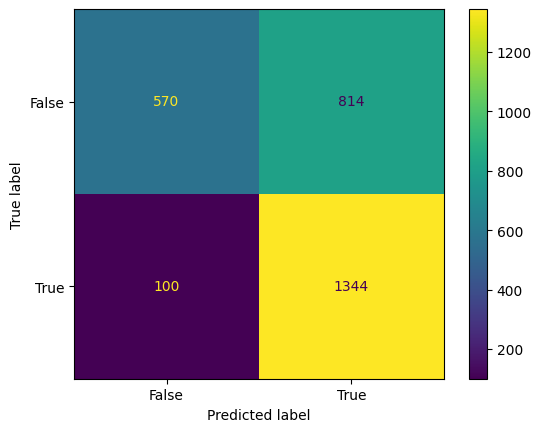

In [57]:
confusion_matrix = confusion_matrix(label_array_unl, data_label_unl)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [58]:
label_array

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
total_label = np.concatenate((label_array, data_label_unl))

In [60]:
total_label

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
total_feature = np.concatenate((feature_array, feature_array_unl))

In [62]:
len(total_feature)

4367

In [63]:
data_list = data_list + data_list_unl

In [64]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

30

In [67]:
group_array = np.hstack(group_list)
group_array

array([ 0,  0,  0, ..., 29, 29, 29])

In [68]:
#train a model on new data
clf=LogisticRegression()
gkf=GroupKFold(n_splits=5)
param_grid = {'classifier__C': [0.01,0.05,0.1,0.5, 1,2,3,4,5,8, 10,12,15]}
pipe=Pipeline([('scaler',StandardScaler()),('classifier',clf)])
gscv=GridSearchCV(pipe,param_grid,cv=gkf,n_jobs=16)
gscv.fit(total_feature,total_label,groups=group_array_1)

C:\Users\kunde\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', LogisticRegression())]),
             n_jobs=16,
             param_grid={'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5,
                                           8, 10, 12, 15]})

In [69]:
gscv.best_score_

0.9821817813778496

In [70]:
## Test on test data 

In [71]:
control_epoch_array_test = [read_data(i) for i in data_test_h]
patient_epoch_array_test = [read_data(i) for i in data_test_p]
data_list_test = control_epoch_array_test + patient_epoch_array_test
data_array_test = np.vstack(data_list_test)
print(data_array_test.shape)
fature_test = []
for d in data_array_test:
    fature_test.append(concatenate_feature(d))
feature_array_test = np.array(fature_test)
feature_array_test.shape
control_epoch_label_test = [len(i)*[0] for i in control_epoch_array_test] 
patient_epoch_label_test = [len(i)*[1] for i in patient_epoch_array_test] 
print(len(control_epoch_label_test), len(patient_epoch_label_test))
label_list_test = control_epoch_label_test + patient_epoch_label_test
label_array_test = np.hstack(label_list_test)
len(label_array_test)

Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 278749  =      0.000 ...  1114.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
278 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 228749  =      0.000 ...   914.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
228 matching events found
No baseline correction appl

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
224 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 224 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h13.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
241 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 241 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\h14.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
216 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 216 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s10.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 212 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s11.edf...
EDF file detected
Setting ch

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished


339 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 339 events and 1250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 271749  =      0.000 ...  1086.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwid

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 283749  =      0.000 ...  1134.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Not setting metadata
283 matching events found
No baseline correction applied
0 projection item

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Extracting EDF parameters from C:\Users\kunde\kund\Ankit_ass\dataverse_files\s14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 542499  =      0.000 ...  2169.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
542 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 542 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.2s finished


(2834, 19, 1250)
5 5


2834

In [72]:
print(np.array(label_array_test))
feature_array_test.shape

[0 0 0 ... 1 1 1]


(2834, 228)

In [73]:
d = gscv.predict(feature_array_test)
d

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
a = classification_report(label_array_test, d)
print(a)

              precision    recall  f1-score   support

           0       0.28      0.21      0.24      1187
           1       0.52      0.61      0.56      1647

    accuracy                           0.44      2834
   macro avg       0.40      0.41      0.40      2834
weighted avg       0.42      0.44      0.43      2834

